In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


In [3]:
img_height, img_width = 32, 32
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "Data/Train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "Data/Train",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [5]:
#Divides every pixel by 255
normalization = tf.keras.layers.Rescaling(1/255.0)

def preprocess(image, label):
    image = normalization(image)
    return image, label

#Applies the normalization without affecting the labels
normalized_train_ds = train_ds.map(preprocess)
normalized_val_ds = val_ds.map(preprocess)

In [9]:
from tensorflow.keras import layers, models, Input

num_classes = 43  # 43 classes

model = models.Sequential([
    Input(shape=(32,32,3)),

    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,675 (319.04 KB)

 Trainable params: 81,675 (319.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model.fit(normalized_train_ds,validation_data = normalized_val_ds, epochs=20)

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.4671 - loss: 1.8851 - val_accuracy: 0.8315 - val_loss: 0.6343
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7805 - loss: 0.7032 - val_accuracy: 0.9120 - val_loss: 0.3442
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8551 - loss: 0.4694 - val_accuracy: 0.9427 - val_loss: 0.2417
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8873 - loss: 0.3673 - val_accuracy: 0.9579 - val_loss: 0.1742
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9079 - loss: 0.2969 - val_accuracy: 0.9662 - val_loss: 0.1380
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9198 - loss: 0.2577 - val_accuracy: 0.9714 - val_loss: 0.1282
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9288 - loss: 0.2216 - val_accuracy: 0.9763 - val_loss: 0.1011
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9383 - loss: 0.1959 - 

In [13]:
y_true = []
y_pred = []

# Loop over validation dataset
for images, labels in normalized_val_ds:
    preds = model.predict(images, verbose=0)         # predictions (probabilities)
    pred_classes = np.argmax(preds, axis=1)          # convert to class IDs
    y_pred.extend(pred_classes)
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy (from predictions): {acc:.4f}")


Validation Accuracy (from predictions): 0.9874


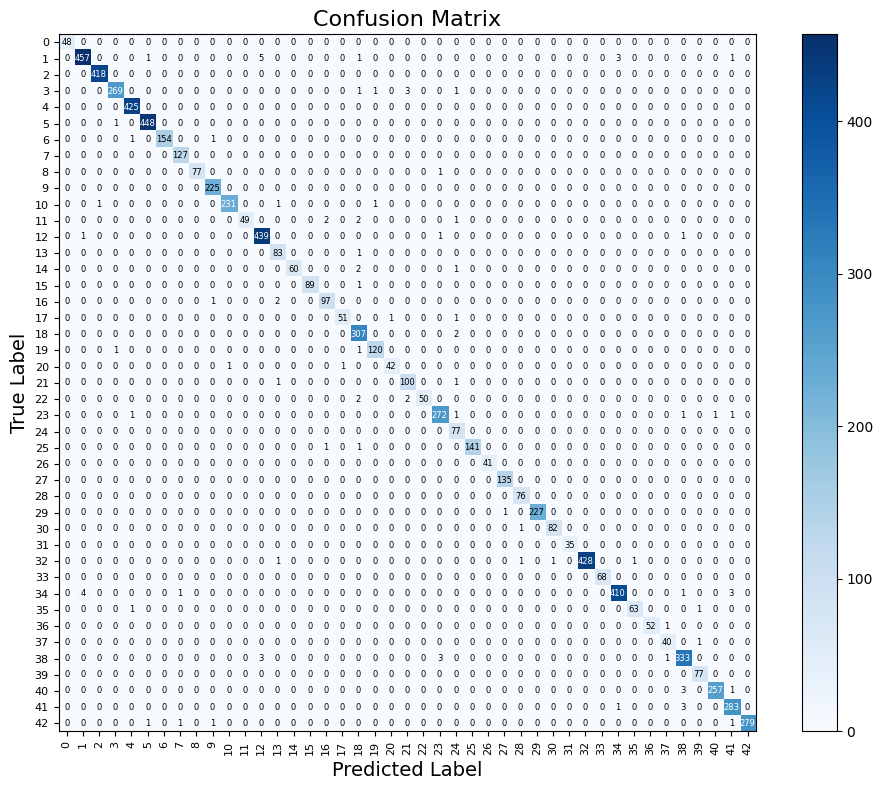

In [20]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))  # bigger figure
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix", fontsize=16)
plt.colorbar()

# Add class labels
num_classes = cm.shape[0]
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, tick_marks, fontsize=8, rotation=90)
plt.yticks(tick_marks, tick_marks, fontsize=8)

# Add numbers in cells
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center", fontsize=6,
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel("True Label", fontsize=14)
plt.xlabel("Predicted Label", fontsize=14)
plt.tight_layout()
plt.show()